# Gráfico

In [7]:
import sqlite3
import datetime
import random
import matplotlib.pyplot as plt
%matplotlib notebook

class Produto:
    def __init__(self):
        self.conn = sqlite3.connect('arquivos/vendas.db')
        self.c = self.conn.cursor()
        
    def __del__(self):
        self.c.close()
        self.conn.close()
    
    def create_table(self):
        self.c.execute('CREATE TABLE IF NOT EXISTS produtos(id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, date TEXT, '\
              'prod_name TEXT, valor REAL)')
    
    
    def populate(self):
        i = 0
        new_prod_name = 'produto'
        while i < 5:
            new_date = datetime.datetime.now()
            new_valor = random.randrange(50,100)
            self.c.execute("INSERT INTO produtos (date, prod_name, valor) VALUES (?, ?, ?)", 
                      (new_date, new_prod_name+' '+str(new_valor), new_valor))
            self.conn.commit()
            i+=1
        
    def clear(self):
        self.c.execute("DELETE FROM produtos")
        self.conn.commit()
    
        
    def mostrar_grafico(self):
        query = self.c.execute('select prod_name,valor FROM produtos')
        result = query.fetchall()
        identificacao = []
        valores = []
        
        for linha in result:
            identificacao.append(linha[0])
            valores.append(linha[1])
        plt.bar(identificacao, valores)
        plt.show()

<IPython.core.display.Javascript object>


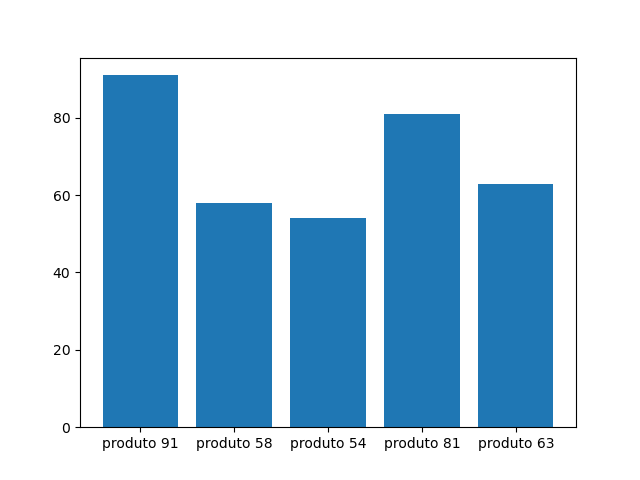

In [8]:
prod = Produto()
prod.create_table()
prod.clear()
prod.populate()
prod.mostrar_grafico()